<a href="https://colab.research.google.com/github/shreyasat27/MSc-QT-/blob/main/task_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install qutip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.1/30.1 MB 17.7 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/qutip/solver/solver_base.py:576: FutureWarning: e_ops will be keyword only from qutip 5.3 for all solver
  warnings.warn(


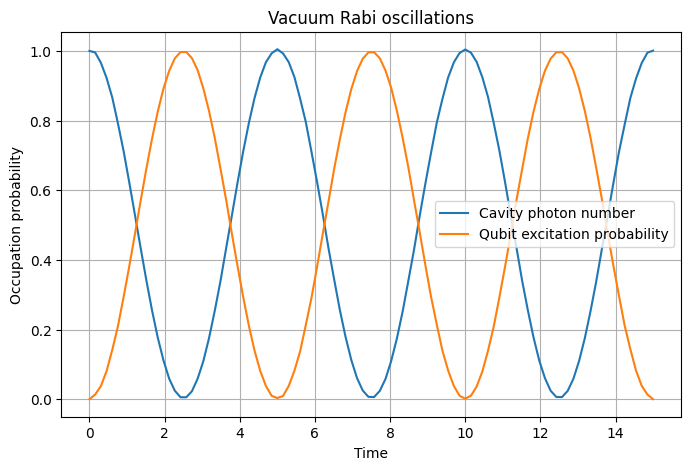

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

# Define system parameters

omega =  2 * np.pi
g = 0.1 * 2 * np.pi         # Coupling strength
N = 15                     # Number of Fock states in the cavity
theta = 0            # Angle determining the qubit orientation
kappa = 0.05             # Cavity dissipation rate
gamma = 0.05              # Qubit relaxation rate
tlist = np.linspace(0, 15, 100)  # Time array for simulation
epsilon=2*omega *np.sin(theta) # Energy detuning of the qubit (in angular frequency units)
t_c = 1* omega *np.cos(theta)     # Tunnel coupling between qubit states (in angular frequency units)

# Initial state
psi0 = tensor(basis(N, 1), (basis(2, 0))) #basis(2,1)).unit())    # Qubit in excited state

# Operators
a = tensor(destroy(N), qeye(2))  # Cavity annihilation operator
adag = a.dag() # Creation operator for the cavity
sigma_x = tensor(qeye(N), Qobj([[0, 1], [1, 0]]))  # Pauli X
sigma_z = tensor(qeye(N), Qobj([[1, 0], [0, -1]]))  # Pauli Z
idn = tensor(qeye(N), Qobj([[1, 0], [0, 1]])) #identity

# Hamiltonian
H_interaction = (g * (a + adag)) * (np.sin(theta) * sigma_z + np.cos(theta) * sigma_x)
H_matrix = -(np.sqrt(((epsilon/2)**2)+t_c**2)*sigma_z)

omega_R=2*np.sqrt(((epsilon/2)**2)+t_c**2) #choose a value

H_res = omega_R * a.dag()*a
H = H_matrix + H_interaction + H_res
# Collapse operators (dissipation)
c_ops = [ ]

# Solve the master equation
output = mesolve(H, psi0, tlist, c_ops, [a.dag() * a,((-sigma_z+idn)/2)])

# Plot the results
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(tlist, output.expect[0], label="Cavity photon number")
ax.plot(tlist, output.expect[1], label="Qubit excitation probability")
ax.legend()
ax.set_xlabel("Time")
ax.set_ylabel("Occupation probability")
ax.set_title("Vacuum Rabi oscillations")
plt.grid()
plt.show()

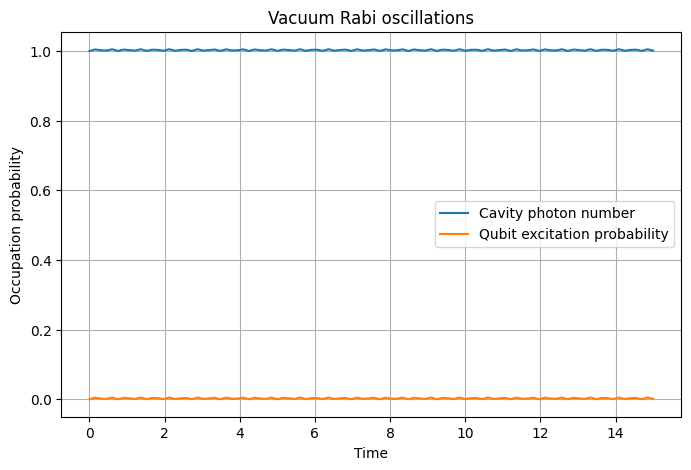

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

# Define system parameters

omega =  2 * np.pi
g = 0.1 * 2 * np.pi         # Coupling strength
N = 15                     # Number of Fock states in the cavity
theta = 0            # Angle determining the qubit orientation
kappa = 0.5             # Cavity dissipation rate
gamma = 0.5              # Qubit relaxation rate
tlist = np.linspace(0, 15, 100)  # Time array for simulation
epsilon=2*omega *np.sin(theta) # Energy detuning of the qubit (in angular frequency units)
t_c = 1* omega *np.cos(theta)     # Tunnel coupling between qubit states (in angular frequency units)

# Initial state
psi0 = tensor(basis(N, 1), (basis(2, 0))) #basis(2,1)).unit())    # Qubit in excited state

# Operators
a = tensor(destroy(N), qeye(2))  # Cavity annihilation operator
adag = a.dag() # Creation operator for the cavity
sigma_x = tensor(qeye(N), Qobj([[0, 1], [1, 0]]))  # Pauli X
sigma_z = tensor(qeye(N), Qobj([[1, 0], [0, -1]]))  # Pauli Z
idn = tensor(qeye(N), Qobj([[1, 0], [0, 1]])) #identity
sigma_minus = tensor(qeye(N), sigmam())
sigma_plus = tensor(qeye(N), sigmap())

# Hamiltonian
H_interaction = g * np.cos(theta) * (a * sigma_plus + adag * sigma_minus)
H_matrix = -(np.sqrt(((epsilon/2)**2)+t_c**2)*sigma_z)

omega_R=2*2*np.pi

H_res = omega_R * a.dag()*a
H = H_matrix + H_interaction + H_res
# Collapse operators (dissipation)
c_ops = []

# Solve the master equation
output = mesolve(H, psi0, tlist, c_ops, [a.dag() * a,((-sigma_z+idn)/2)])

# Plot the results
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(tlist, output.expect[0], label="Cavity photon number")
ax.plot(tlist, output.expect[1], label="Qubit excitation probability")
ax.legend()
ax.set_xlabel("Time")
ax.set_ylabel("Occupation probability")
ax.set_title("Vacuum Rabi oscillations")
plt.grid()
plt.show()

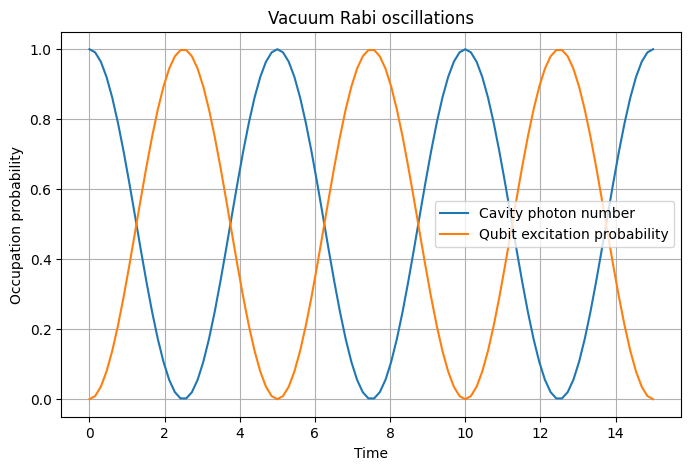

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

# Define system parameters

omega =  2 * np.pi
g = 0.1 * 2 * np.pi         # Coupling strength
N = 5                     # Number of Fock states in the cavity
theta = 0            # Angle determining the qubit orientation
kappa = 0.5             # Cavity dissipation rate
gamma = 0.5              # Qubit relaxation rate
tlist = np.linspace(0, 15, 100)  # Time array for simulation
epsilon=2*omega *np.sin(theta) # Energy detuning of the qubit (in angular frequency units)
t_c = 1* omega *np.cos(theta)     # Tunnel coupling between qubit states (in angular frequency units)

# Initial state
psi0 = tensor(basis(N, 1), (basis(2, 0))) #basis(2,1)).unit())    # Qubit in excited state

# Operators
a = tensor(destroy(N), qeye(2))  # Cavity annihilation operator
adag = a.dag() # Creation operator for the cavity
sigma_x = tensor(qeye(N), Qobj([[0, 1], [1, 0]]))  # Pauli X
sigma_z = tensor(qeye(N), Qobj([[1, 0], [0, -1]]))  # Pauli Z
idn = tensor(qeye(N), Qobj([[1, 0], [0, 1]])) #identity
sigma_minus = tensor(qeye(N), sigmam())
sigma_plus = tensor(qeye(N), sigmap())

# Hamiltonian
H_interaction = g * np.cos(theta) * (a * sigma_minus + adag *sigma_plus )
H_matrix = -(np.sqrt(((epsilon/2)**2)+t_c**2)*sigma_z)

omega_R=2*2*np.pi

H_res = omega_R * a.dag()*a
H = H_matrix + H_interaction + H_res
# Collapse operators (dissipation)
c_ops = []

# Solve the master equation
output = mesolve(H, psi0, tlist, c_ops, [a.dag() * a,((-sigma_z+idn)/2)])

# Plot the results
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(tlist, output.expect[0], label="Cavity photon number")
ax.plot(tlist, output.expect[1], label="Qubit excitation probability")
ax.legend()
ax.set_xlabel("Time")
ax.set_ylabel("Occupation probability")
ax.set_title("Vacuum Rabi oscillations")
plt.grid()
plt.show()